In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('../results/outputs/handled_missing_data.csv')

In [3]:
numeric_cols = df.select_dtypes(include="number").columns
print("Numeric Columns:", numeric_cols)

Numeric Columns: Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')


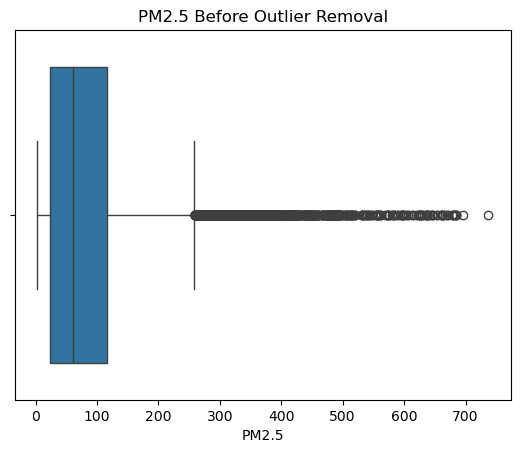

In [10]:
# Step 2: EDA Visualization - Boxplot before outlier removal for PM2.5
sns.boxplot(x=df['PM2.5'])
plt.title("PM2.5 Before Outlier Removal")
os.makedirs('../results/eda_visualizations', exist_ok=True)
plt.savefig('../results/eda_visualizations/boxplot_pm25_before.png')
plt.show()

In [5]:
#Q1,2,3
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [6]:
#Condition to keep only non-outliers
condition = ~(
    ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
    .any(axis=1)
)

In [7]:
#Apply condition
df_cleaned = df[condition]

print("Original dataset shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)

Original dataset shape: (35064, 18)
After outlier removal: (26125, 18)


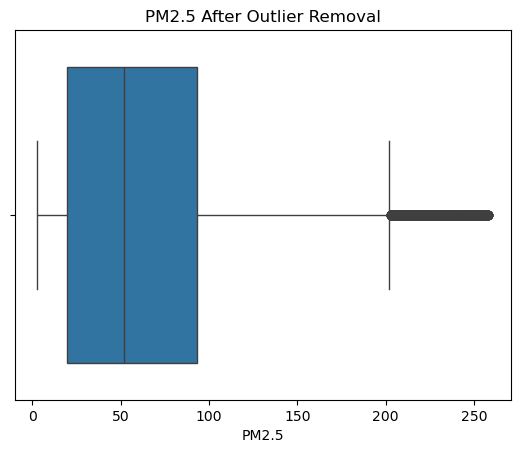

In [9]:
#Boxplot after outlier removal for PM2.5
sns.boxplot(x=df_cleaned['PM2.5'])
plt.title("PM2.5 After Outlier Removal")
plt.savefig('../results/eda_visualizations/boxplot_pm25_after.png')
plt.show()

In [11]:
os.makedirs('../results/outputs', exist_ok=True)
df_cleaned.to_csv('../results/outputs/handled_outliers.csv', index=False)